<a href="https://colab.research.google.com/github/jcmartin-gh/jcmmVideoChat/blob/main/VideoChat_RAG_v1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VideoChat RAG application

Basado en el notebook de https://www.youtube.com/@underfitted, svpino

*Building a RAG application from scratch using Python, LangChain, and the OpenAI API.*

[Enlace al video](https://youtu.be/BrsocJb-fAo?si=jCZTqPAB5md4JVwV)

#DESCRIPCIÓN

#Objetivo:

Desarrollar un sistema de IA para resumir videos, responder preguntas sobre su contenido y permitir búsquedas de información dentro de los videos.


#Funcionalidades:

* Buscar videos sobre un tema específico.
* Resumir uno o varios videos.
* Chatear sobre la información contenida en esos videos..





#Interacción con el Usuario:

* Botón de acceso a la aplicación dentro de la página web de IDESIE.
* El botón solamente aparecerá para aquellos usuarios que hayan iniciado sesión.
* Presentar un listado de los videos (tipo Youtube) para poder elegir uno o varios de de ellos con los que queremos interactuar (o interactuar con todos).
* También debe permitir darle como input la URL de un video del repositorio.
Si no está en el repositorio debe sacar un mensaje diciéndolo.
Una vez elegido el o los videos comienza la interacción con ellos.
La respuesta debe contener enlaces a la parte correspondiente del video (si aplica).
* Imponer un máximo de interacciones por usuario/día
* Seguir consejos de la guía HAX para el desarrollo de la interfaz de Usuario.

#Implementación del Modelo


1.   Modelo de IA.

     Utilizaremos la técnica **RAG**, Retrieval-Augmented Generation (Generación Aumentada con Recuperación).

2.   Lenguaje de Programación.

     **Python**
3.   Plataforma para gestión y desarrollo del proyecto.

     **Github**
4.   Entorno IDE
     
     **Google Colab**
5.   Framework
     
     Plataforma **Langchain** porque facilita la gestión de interacciones con los LLM
6.   Frontend

     **Streamlit**

#Esquema funcionamiento del Modelo

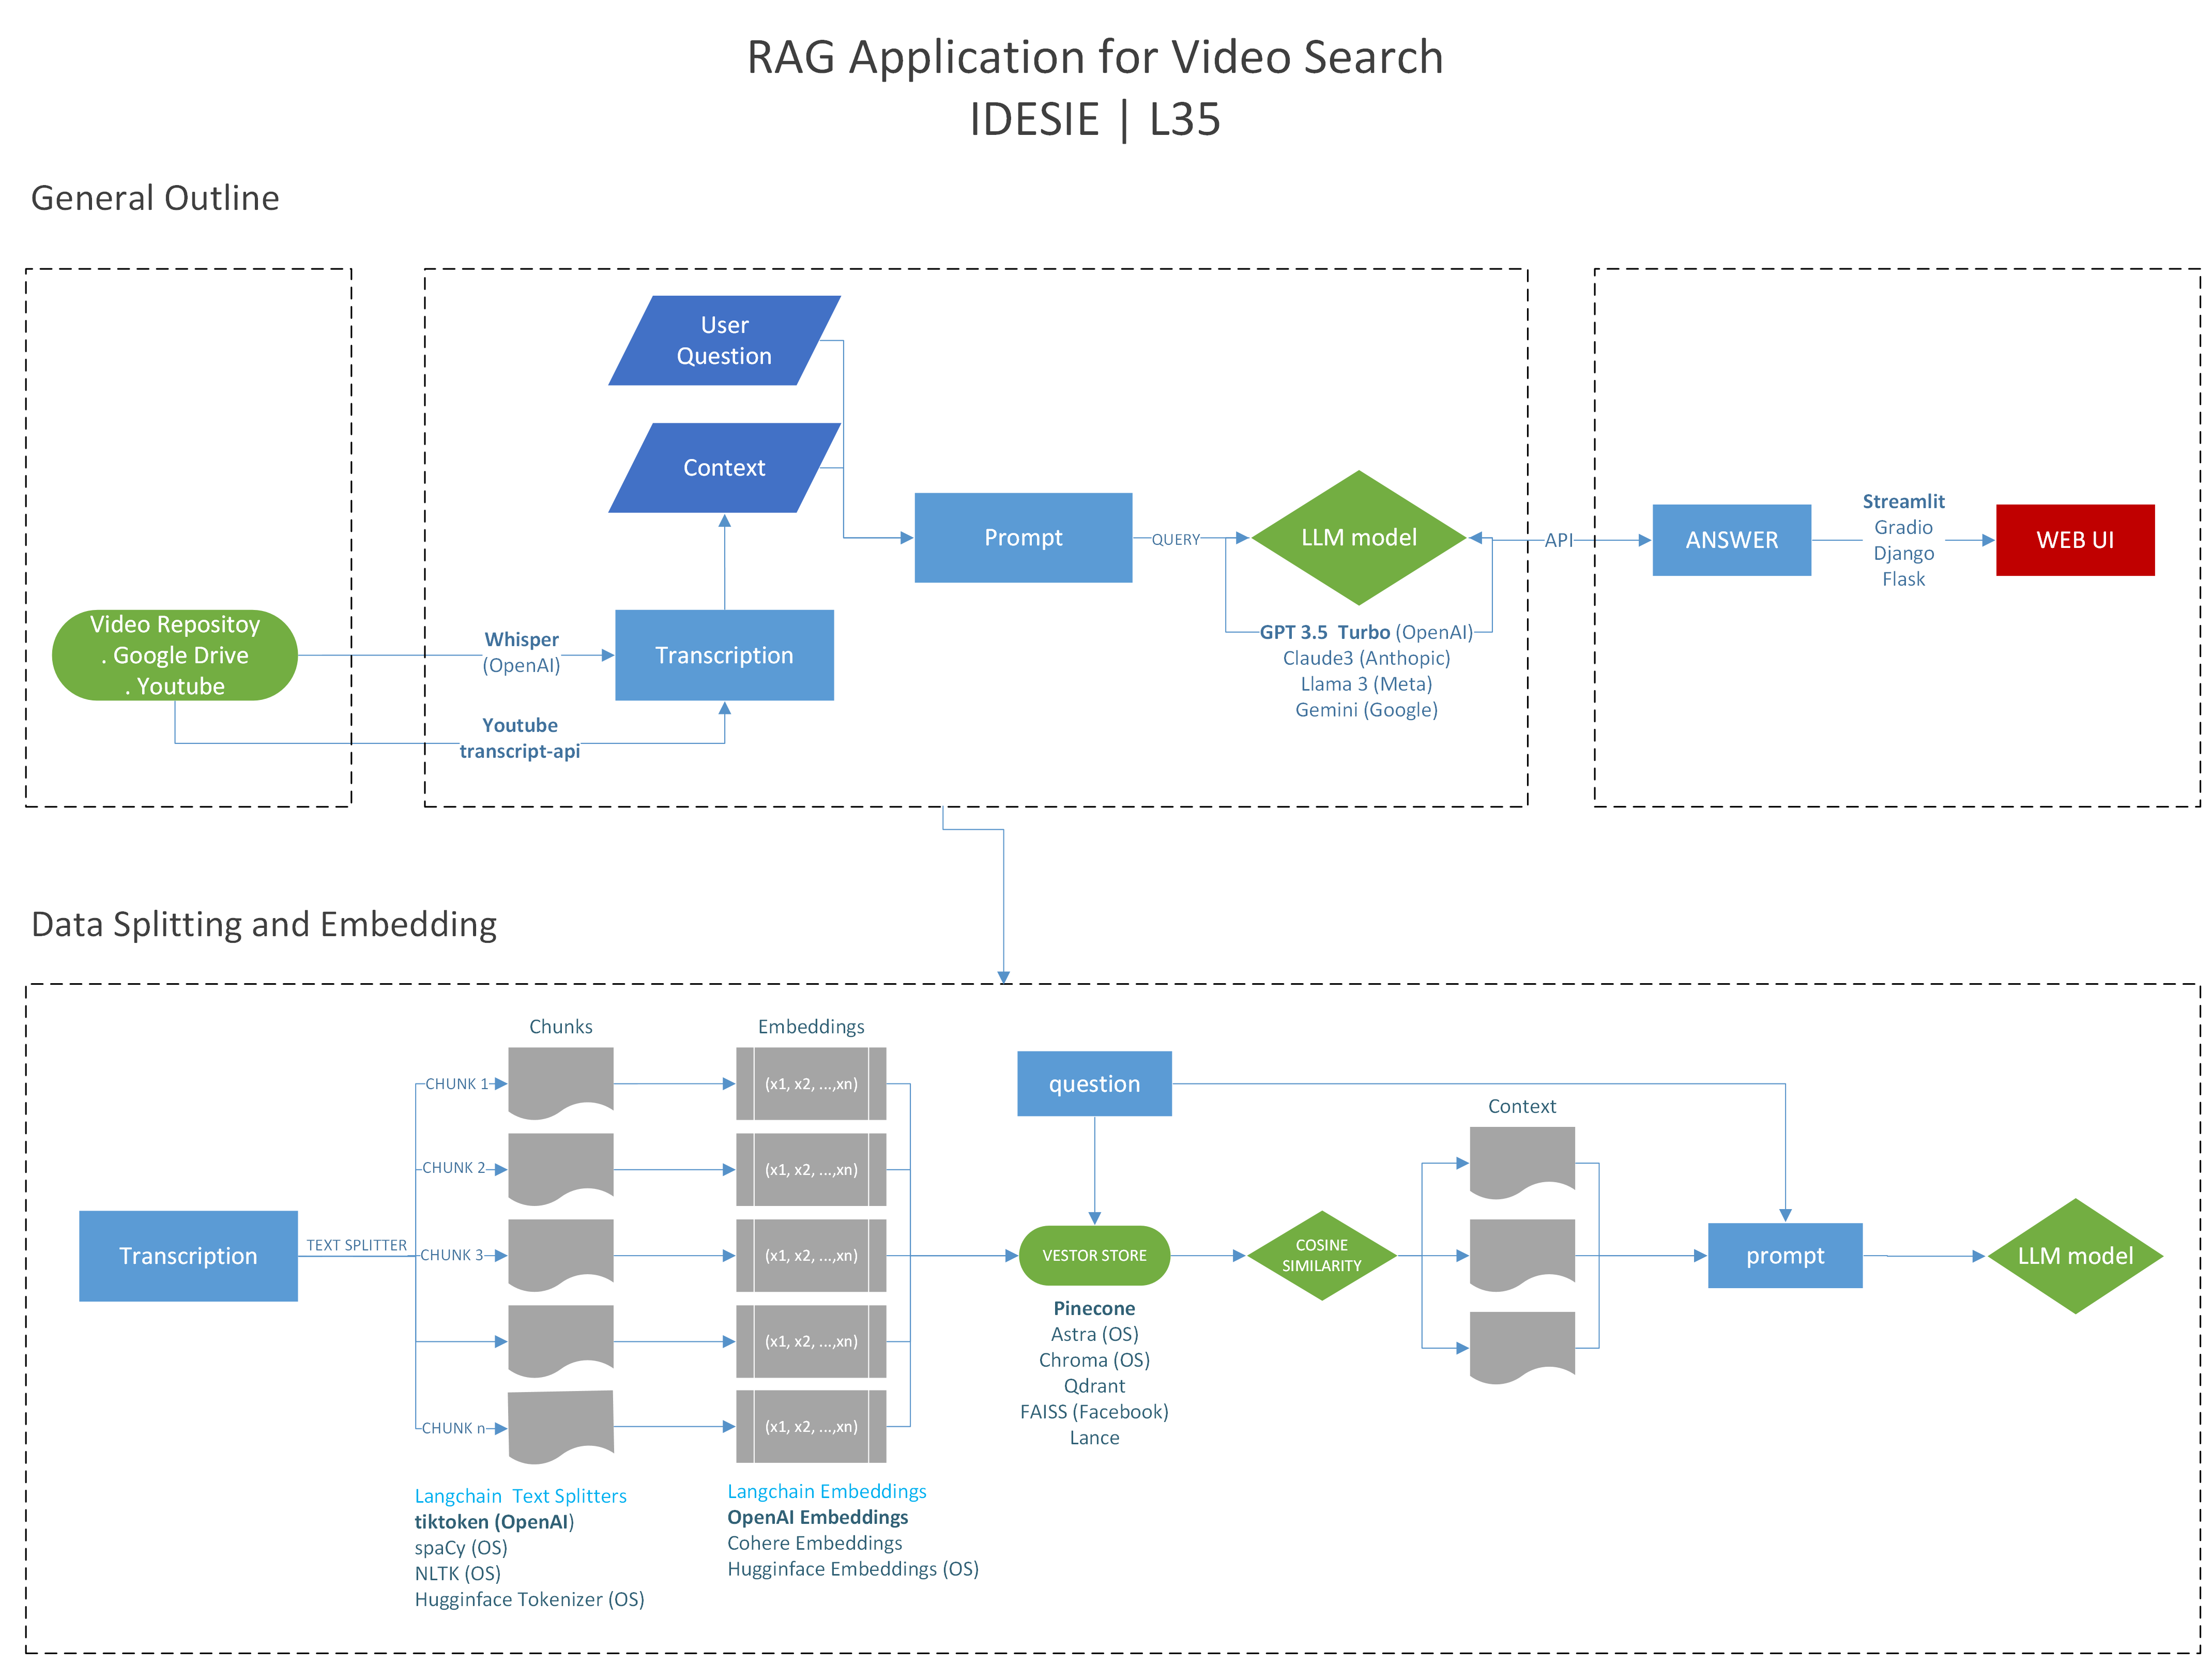

#1. Configurar el entorno:
Primero, asegúrate de que tu notebook de Google Colab tenga acceso a una GPU para acelerar el procesamiento.

Puedes hacerlo yendo a "Entorno de ejecución" > "Cambiar tipo de entorno de ejecución" y seleccionando "T4 GPU".

#2.Installing the requirements
A lo largo de este notebook iremos instalando las siguientes librerías:

* openai

* langchain

* langchain-openai

* langchain_pinecone

* langchain[docarray]

* docarray

* pydantic==1.10.8

* pytube

* python-dotenv

* tiktoken

* pinecone-client.

* scikit-learn

* torch

* Transformers

* whisper

##OpenAI

In [1]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.1/324.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.3 MB/s eta 0:00:00


##Langchain

La biblioteca [LangChain](https://python.langchain.com/v0.2/docs/introduction/) es una herramienta para trabajar con modelos de lenguaje y construir aplicaciones de inteligencia artificial complejas.

LangChain facilita la integración de modelos de lenguaje en flujos de trabajo más amplios, proporcionando diversas utilidades para manipular y procesar los resultados generados por estos modelos.

`DocArray` es una biblioteca poderosa para gestionar documentos en proyectos de inteligencia artificial, proporcionando herramientas para estructurar, manipular, almacenar y buscar datos de manera eficiente. Es especialmente útil en aplicaciones donde se necesita manejar diferentes tipos de datos y realizar búsquedas complejas.

In [2]:
!pip install langchain
!pip install langchain_openai
!pip install docarray
!pip install langchain[docarray]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 973.5/973.5 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 61.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.2/310.2 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.4/124.4 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.5/239.5 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.3/124.3 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.6/301.6 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 616.0/616.0 kB 45.5 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling 

##Librerías para gestión de datos y Tokens

1. Pydantic
*   Propósito: Validación de datos y gestión de configuración.
*   Descripción: Pydantic es una biblioteca para validar datos y gestionar configuraciones basándose en anotaciones de tipo (type hints). Permite definir modelos de datos con validación automática y conversión de tipos.
*   Usos Comunes:
Validar datos entrantes en aplicaciones web.
Gestionar y validar configuraciones de aplicaciones.
Convertir datos de diferentes formatos a objetos Python con tipado fuerte.

2. Pytube
*   Propósito: Descarga de videos de YouTube.
*   Descripción: Pytube es una biblioteca ligera para descargar videos de YouTube. Permite buscar, descargar y convertir videos y listas de reproducción.
*   Usos Comunes: Descargar videos y audios de YouTube para consumo offline.
Extraer metadatos de videos de YouTube.
Crear aplicaciones para la descarga masiva de contenido de YouTube.

3. python-dotenv
*   Propósito: Cargar variables de entorno desde un archivo .env.
*   Descripción: python-dotenv es una biblioteca que carga variables de entorno desde un archivo .env al entorno de ejecución de Python. Esto es útil para gestionar configuraciones sensibles y credenciales de manera segura.
*   Usos Comunes:
Gestionar configuraciones de desarrollo y producción.
Almacenar credenciales y claves API de manera segura.
Configurar aplicaciones sin hardcodear valores sensibles en el código.

4. tiktoken
*   Propósito: Tokenización de texto para modelos de lenguaje.
*   Descripción: tiktoken es una biblioteca utilizada para tokenizar texto en los componentes básicos necesarios para los modelos de lenguaje, como los desarrollados por OpenAI. La tokenización es el proceso de dividir el texto en unidades más pequeñas como palabras, subpalabras o caracteres.
*   Usos Comunes:
Preparar texto para ser procesado por modelos de lenguaje.
Manipular tokens para tareas de NLP (Procesamiento del Lenguaje Natural).
Convertir texto en una forma que los modelos de IA puedan entender y procesar.

In [3]:
!pip install pydantic==1.10.8
!pip install tiktoken
!pip install python-dotenv
#!pip install pytube

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 9.6 MB/s eta 0:00:00
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.7.2
    Uninstalling pydantic-2.7.2:
      Successfully uninstalled pydantic-2.7.2


##3.Environment
Ahora vamos instalar las variables de entorno.

Para utilizar los modelos de OpenAI y Pinecone necesitaremos las API-KEY de ambos.

Estas claves las guardaremos en un archivo de nuestro disco llamado ".env" para que no estén expuestas en el notebook.

Este archivo tenemos que subirlo al almacenamiento de sesión pulsando en "Archivos" de la parte lateral izquierda y luego en "Subir al almacenamiento de sesión" (icono de una página con una flecha)

In [4]:
import os
from dotenv import load_dotenv
load_dotenv()

OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
#print (OPENAI_API_KEY)

## 4.Setting up the model
Let's define the LLM model that we'll use as part of the workflow.

He incorporado otros parámetros para regular el comportamiento del modelo.

`temperature` Valor entre 0 y 1. (por defecto = 0.7). Cuanto más alto más creativo es el modelo.

`max_tokens` Limita la respuesta a un número máximo de tokens.

`top_p` Valor entre 0 y 1 (por defecto = 1)

Define el umbral de probabilidad acumulada para los tokens seleccionables. Controla la diversidad de la salida seleccionando los tokens a partir de un subconjunto de la distribución de probabilidad. En lugar de seleccionar el siguiente token basado únicamente en la probabilidad individual (como en el muestreo aleatorio), el modelo selecciona entre los tokens cuya probabilidad acumulada alcanza como mucho el valor de *top_p* de la distribución de probabilidad.

`frequency_penalty` Valor entre 0 y 1 (por defecto=0 no penaliza).

Penaliza la frecuencia de aparición de tokens.

`presence_penalty` Valor entre -2 y 2 (por defecto = 0).

Penaliza la aparición de tokens ya presentes, incentivando así la generación de contenido que explore nuevas ideas o direcciones relacionadas con el mensaje inicial. Cuanto más alto más penaliza, es decir, más incentiva la generación de contenido nuevo.

In [5]:
from langchain_openai.chat_models import ChatOpenAI

model_name = "gpt-3.5-turbo"

model = ChatOpenAI(
    openai_api_key=OPENAI_API_KEY,
    model=model_name,
    temperature=0,
    max_tokens=1000,
    #top_p=1,
    #frequency_penalty=0,
    #presence_penalty=0.6
)

###Test the model
 by asking a simple question.


Pulsa aquí [invoke](https://medium.com/@terrycho/3-how-to-invoke-llm-from-langchain-7325988e3097) para más información acerca de este comando.

In [6]:
model.invoke("¿Quién ganó el mundial de futbol de 2014?")

AIMessage(content='Alemania ganó el Mundial de Fútbol de 2014, que se celebró en Brasil. En la final, Alemania venció a Argentina 1-0 con un gol de Mario Götze en tiempo extra.', response_metadata={'token_usage': {'completion_tokens': 51, 'prompt_tokens': 22, 'total_tokens': 73}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-86cea1ad-161d-4a63-be6f-a2255db38921-0', usage_metadata={'input_tokens': 22, 'output_tokens': 51, 'total_tokens': 73})

#5. Seguimiento del número de tokens y coste

In [7]:
import tiktoken
from tiktoken import encoding_for_model
from langchain_openai.chat_models import ChatOpenAI
import openai

##Recuento de tokens del prompt

In [8]:
# Selecciona el codificador del modelo que estás utilizando, por ejemplo, para
# GPT-3.5-turbo
encoding = tiktoken.encoding_for_model(model_name)

# El texto que quieres evaluar
prompt = "¿Quién ganó el mundial de fútbol de 2014?"

# Calcula el número de tokens
num_prompt_tokens = len(encoding.encode(prompt))

print(f"Número de tokens: {num_prompt_tokens}")


Número de tokens: 17


##Recuento de Tokens Totales

In [9]:
# Llamada a la API de OpenAI

response = model.invoke(prompt)

# Acceder al contenido de la respuesta
content = response.content
print(f"Content: {content}")

# Acceder a los metadatos de la respuesta
response_metadata = response.response_metadata
print(f"Response Metadata: {response_metadata}")

# Acceder al uso de tokens
token_usage = response_metadata['token_usage']
completion_tokens = token_usage['completion_tokens']
prompt_tokens = token_usage['prompt_tokens']
total_tokens = token_usage['total_tokens']

print(f"Completion tokens: {completion_tokens}")
print(f"Prompt tokens: {prompt_tokens}")
print(f"Total tokens: {total_tokens}")

# Acceder al nombre del modelo utilizado
model_name = response_metadata['model_name']
print(f"Model name: {model_name}")

# Acceder al ID de la respuesta
response_id = response.id
print(f"Response ID: {response_id}")


Content: Alemania ganó el Mundial de Fútbol de 2014, que se celebró en Brasil. En la final, Alemania venció a Argentina 1-0 con un gol de Mario Götze en tiempo extra.
Response Metadata: {'token_usage': {'completion_tokens': 51, 'prompt_tokens': 24, 'total_tokens': 75}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}
Completion tokens: 51
Prompt tokens: 24
Total tokens: 75
Model name: gpt-3.5-turbo
Response ID: run-80a2b8df-028e-49db-8fc4-3ac02a2ca89a-0


##Calculo del coste

Asegúrate de que los precios coinciden con los publicados en la página de OpenAI.


[OpenAI prices](https://openai.com/api/pricing/)

In [10]:
# Costos (por 1000 tokens) para GPT-3.5-turbo 26/05/2024
# Verifica los costos reales en la documentación de OpenAI
cost_per_1000_tokens_prompt = 0.0005  # USD 0.50$/1 million tokens
cost_per_1000_tokens_completion = 0.0015  # USD 1.50$/1 million tokens

# Calcula el costo total
cost_prompt = (prompt_tokens / 1000) * cost_per_1000_tokens_prompt
cost_completion = (completion_tokens / 1000) * cost_per_1000_tokens_completion
total_cost = cost_prompt + cost_completion

print(f"Número de tokens del prompt: {prompt_tokens}")
print(f"Número de tokens de la respuesta: {completion_tokens}")
print(f"Costo del prompt: ${cost_prompt:.6f}")
print(f"Costo de la respuesta: ${cost_completion:.6f}")
print(f"Costo total: ${total_cost:.6f}")


Número de tokens del prompt: 24
Número de tokens de la respuesta: 51
Costo del prompt: $0.000012
Costo de la respuesta: $0.000077
Costo total: $0.000089


#6. Output Parser

The result from the model is an `AIMessage` instance containing the answer.

We can extract this answer by chaining the model with an [output parser](https://python.langchain.com/docs/modules/model_io/output_parsers/).

For this example, we'll use a simple `StrOutputParser` to extract the answer as a string.

`StrOutputParser` es una clase de la biblioteca LangChain. Se utiliza para procesar y estructurar la salida generada por un modelo de lenguaje. En términos más específicos, este parser toma la salida del modelo (que típicamente es una cadena de texto) y la convierte en un formato más estructurado y manejable, como un diccionario o un objeto de Python.

In [11]:
from langchain_core.output_parsers import StrOutputParser

parser = StrOutputParser()

chain = model | parser
chain.invoke("quien ganó el mundial de futbol de 2014?")

'Alemania ganó el Mundial de Fútbol de 2014, que se celebró en Brasil. En la final, Alemania venció a Argentina 1-0 con un gol de Mario Götze en tiempo extra.'

#7. Prompt templates

Para proporcionar al modelo el *contexto* y la *pregunta* usaremos los "prompt templates".

Los "prompt templates" (plantillas de prompts), en aplicaciones de procesamiento de lenguaje natural (NLP), son estructuras predefinidas que facilitan la generación de prompts o entradas de texto para modelos de lenguaje.

Estas plantillas se utilizan para formatear las entradas de manera consistente y efectiva, lo que ayuda a los modelos de lenguaje a entender y procesar las solicitudes de los usuarios de manera más precisa.

Los [Prompt templates](https://python.langchain.com/docs/modules/model_io/prompts/quick_start) ayudan a estructurar la entrada de manera que el modelo pueda entender claramente el contexto y la pregunta. Además permite reutizarlos sin tener que volver a implementar más código.

In [12]:
from langchain.prompts import ChatPromptTemplate

template = """
Answer the question based on the context below. If you can't
answer the question, reply "I don't know".

Context: {context}

Question: {question}
"""

prompt = ChatPromptTemplate.from_template(template)
prompt.format(context="Cintia, Guillermo, Leire y Lourdes son alumnos del Master BIM",
              question="Quién es Leire?")

'Human: \nAnswer the question based on the context below. If you can\'t\nanswer the question, reply "I don\'t know".\n\nContext: Cintia, Guillermo, Leire y Lourdes son alumnos del Master BIM\n\nQuestion: Quién es Leire?\n'

We can now chain the prompt with the model and the output parser.

<img src='images/chain2.png' width="1200">

In [13]:
chain = prompt | model | parser
chain.invoke({
    "context": "El grupo de investigación ESIDE-L35 está formado por Cintia, Guillermo, Leire y Lourdes.",
    "question": "quien ganó el mundial de futbol de 2010?"
})

"I don't know."

In [14]:
chain.invoke({
    "context": "El grupo de investigación ESIDE-L35 está formado por Cintia, Guillermo, Leire y Lourdes.",
    "question": "Quién es Leire?"
})

'Leire es un miembro del grupo de investigación ESIDE-L35.'

# 8.Transcribing the YouTube Video

La transcripción del video será el contexto que mandemos la modelo para luego hacerle preguntas sobre él.

Tenemos 2 maneras de hacerlo:

1. Si no tenemos la transcripción, tenemos que utilizar un modelo que tome el audio y lo convierta a texto.

  En este caso utilizaremos **Whisper** de OpenAI

  Instalamos las dependencias necesarias, incluyendo la implementación de Whisper desde Hugging Face Transformers y PyTorch.

2. Si tenemos la transcripción porque lo hemos cargado en Youtube, utilizaremos la librería "**youtube-transcript-api**"

  Esta biblioteca nos pide el 'id' del video, que es el siguiente, dependiendo de la URL de YouTube:

  URL estándar: https://www.youtube.com/watch?v=jtMkmhaDKgk

  URL corta: https://youtu.be/jtMkmhaDKgk?si=w820zbUyv4PuTw8U

  En ambos casos, el ID del video es jtMkmhaDKgk.

In [15]:
YOUTUBE_VIDEO_URL = "https://youtu.be/ARJ8cAGm6JE?si=Yv4Kw_Pfobj6VaD4"
#Escena de 2001 Space Odyssey

##8.1 Transcribing with Whisper

In [ ]:
!pip install git+https://github.com/openai/whisper.git
!pip install transformers
!pip install torch

  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-5e81_lgk
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-5e81_lgk
  Resolved https://github.com/openai/whisper.git to commit ba3f3cd54b0e5b8ce1ab3de13e32122d0d5f98ab
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-p

Let's download the video and transcribe it using [OpenAI's Whisper](https://openai.com/research/whisper).

Este proceso tardará algunos minutos dependiendo de la GPU.

Se creará un archivo en el almacenamiento actual con la transcripción del video.

Podemos descargarnos este archivo para poder utilizarlo en otras sesiones sin tener que implementar "whisper"

In [ ]:
import tempfile
import whisper
from pytube import YouTube


# Let's do this only if we haven't created the transcription file yet.
if not os.path.exists("transcription_w.txt"):
    youtube = YouTube(YOUTUBE_VIDEO_URL)
    audio = youtube.streams.filter(only_audio=True).first()

    # Let's load the base model. This is not the most accurate
    # model but it's fast.
    whisper_model = whisper.load_model("base")

    with tempfile.TemporaryDirectory() as tmpdir:
        file = audio.download(output_path=tmpdir)
        transcription = whisper_model.transcribe(file, fp16=False)["text"].strip()

        with open("transcription_w.txt", "w") as file:
            file.write(transcription)

100%|████████████████████████████████████████| 139M/139M [00:01<00:00, 123MiB/s]


Let's read the transcription and display the first few characters to ensure everything works as expected.

In [ ]:
with open("transcription_w.txt") as file:
    transcription = file.read()

transcription[:1000]

'¿Y qué es precisamente hace lo que pretendemos hacer? No, resumir, bueno, hace una parte de lo que pretendemos hacer, ¿no? Sí, resumir el tuy, subes el vídeo, ¿no? Sí, ¿no? Y te saca un resumen de lo que dice el vídeo. Sí, ¿no? Lo que dice, lo que aparece en el vídeo. Tal y como lo comento José Carlos, la idea era más ambiciosa, ¿no? Sí, sí, sí. De poder tal, ¿no? Desde hoy, llévame. La idea que si yo he tenido bien es buscar, intentar con una inteligencia atifrada, hacer busqueras sobre los incontinidos de los vídeos. Exacto, esa es la idea. Pero bueno, pero ya buscando y tal, ¿no? Pero a menos ya tienes, o sea, hemos encontrado yo una solución que nos llega. Luego también estaba viendo cuál era la, pero no acabé de encontrar en las diapositivas, la solución de vídeo que José Carlos presentó en la clase. Por si hacía... No me suele, ¿qué presentó en peor? Sí, él, cuando hizo, cuando él puso el ejercicio de ese que identificáramos si lo había hecho en francés o lo había hecho en inglé

##8.2 Transcribing with "**youtube-transcript-api**"


In [16]:
!pip install youtube-transcript-api


Extraer el ID de un video de Youtube de forma automática

In [17]:
import re

def extract_video_id(url):
    # Intenta extraer el ID del video de la URL estándar y corta
    patterns = [
        r'(?:https?://)?(?:www\.)?youtube\.com/watch\?v=([^&]+)',  # URL estándar
        r'(?:https?://)?youtu\.be/([^?]+)'                         # URL corta
    ]

    for pattern in patterns:
        match = re.search(pattern, url)
        if match:
            return match.group(1)

    raise ValueError("URL de video no válida")

# Reemplaza 'your_video_url' con la URL del video de YouTube
video_url = YOUTUBE_VIDEO_URL
YOUTUBE_VIDEO_ID = extract_video_id(video_url)
print(YOUTUBE_VIDEO_ID)


ARJ8cAGm6JE


Extraer la transcripción con el ID del video

In [18]:
from youtube_transcript_api import YouTubeTranscriptApi

def get_transcript(video_id):
    try:
        # Obtener la transcripción del video
        transcript = YouTubeTranscriptApi.get_transcript(video_id, languages=['en'])

        # Concatenar las partes de la transcripción en un solo texto
        transcript_text = "\n".join([entry['text'] for entry in transcript])
        return transcript_text

    except Exception as e:
        return str(e)

video_id = YOUTUBE_VIDEO_ID
transcription_y = get_transcript(video_id)
with open("transcription_y.txt", "w") as file:
            file.write(transcription_y)

In [19]:
#imprime los 1000 primeros caracteres
print(transcription_y[:1000])

open the PO bay doors please
H open the P bay doors please
H hello hell do you read
me hello hell do you read
me do you read me
H you read me
H hello hell do you read
me hello hell do you read me do you read
me H affirmative Dave I read you
open the pod bay doors
hell I'm sorry Dave I'm afraid I can't
do
that what's the
problem I think you know what the
problem is just as well as I do what are
you talking about
H this mission is too important for me
to allow you to jeopardize
it I don't know what you're talking
about
HAL I know that you and Frank were
planning to disconnect
me and I'm afraid that's something I
cannot allow to
happen where the hell did you get that
idea H Dave although you took very
thorough precautions in the part against
my hearing
you I could see your lips move
all right
hell I'll go in through the emergency
airlock without your space helmet
Dave you're going to find that rather
difficult H I won't argue with you
anymore open the
doors
Dave this conversation can serv

#9. Vector Store.


Cuando la duración del video es corta el tamaño del contexto del modelo puede ser suficiente para cargar la transcripción y responder.

In [20]:
try:
    response = chain.invoke({
        "context": transcription_y,
        "question": """Create a detailed summary of the provided text.
        The summary should include the most important topics discussed in each chapter, organized sequentially by chapter.
        The summary should be comprehensive and long enough to extract the maximum amount of information possible.
        """
    })
    print(response)
    with open("summary_y.txt", "w") as file:
        file.write(response)
except Exception as e:
    print(e)

Chapter 1: The conversation begins with HAL, the artificial intelligence computer, being asked to open the pod bay doors. HAL responds by stating that he can't do that and questions the problem. The conversation continues with HAL expressing concern about the importance of the mission and not allowing any jeopardization.

Chapter 2: HAL accuses Dave of planning to disconnect him, which Dave denies. HAL mentions that despite precautions, he could still see Dave's lips move. Dave threatens to go through the emergency airlock without a space helmet, to which HAL warns it will be difficult.

Chapter 3: Dave decides not to argue further and requests HAL to open the doors. HAL responds by stating that the conversation serves no purpose anymore and bids goodbye.

Overall, the text depicts a tense exchange between HAL and Dave, with HAL becoming increasingly suspicious of Dave's intentions and ultimately refusing to comply with Dave's requests. The conversation highlights the power struggle be

Sin embargo, lo habitual es que bien por el tamaño del video o bien por el número de videos a procesar, el contexto del modelo no sea suficiente.

Es en estos casos cuando entra en juego el concepto de *Vector Store*.

Un *Vector Store* es una base de datos especializado en el almacenamiento y proceso de vectores.

Utilizaremos `Pinecone` como Vector Store.
Se necesita una API_KEY y API_ENV.

En el *Vector Store* almacenaremos fragmentos del texto para que la búsqueda de respuestas a nuestro prompt sea más eficiente.
Es lo que se connoce como *Text Splitting*


##Splitting the transcription

Since we can't use the entire transcription as the context for the model, a potential solution is to split the transcription into smaller chunks. We can then invoke the model using only the relevant chunks to answer a particular question:


Let's start by loading the transcription in memory.

*Añadimos gestión de errores*

In [21]:
!pip install langchain_community
from langchain_community.document_loaders import TextLoader

# Verificar si el archivo existe
file_path = "transcription_y.txt"
if not os.path.exists(file_path):
    raise FileNotFoundError(f"El archivo {file_path} no existe.")

# Cargar el archivo de transcripción
loader = TextLoader(file_path)
try:
    text_documents = loader.load()
except Exception as e:
    print(f"Error al cargar el documento: {e}")
    text_documents = []

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 6.1 MB/s eta 0:00:00


There are many different ways to split a document. For this example, we'll use a simple splitter that splits the document into chunks of a fixed size. Check [Text Splitters](https://python.langchain.com/docs/modules/data_connection/document_transformers/) for more information about different approaches to splitting documents.



*Vamos a dividir la transcripción en segmentos de 200 caracteres con un solapamiento de 50 caracteres.
Después imprimiremos los 2 primeros segementos para comprobar este solapamiento.*

In [22]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=200, chunk_overlap=50)
documents = text_splitter.split_documents(text_documents)
print (documents[:1])
print (documents[1:2])


[Document(page_content='open the PO bay doors please\nH open the P bay doors please\nH hello hell do you read\nme hello hell do you read\nme do you read me\nH you read me\nH hello hell do you read', metadata={'source': 'transcription_y.txt'})]
[Document(page_content="H you read me\nH hello hell do you read\nme hello hell do you read me do you read\nme H affirmative Dave I read you\nopen the pod bay doors\nhell I'm sorry Dave I'm afraid I can't\ndo\nthat what's the", metadata={'source': 'transcription_y.txt'})]


## Finding the relevant chunks

Given a particular question, we need to find the relevant chunks from the transcription to send to the model. Here is where the idea of **embeddings** comes into play.

An embedding is a mathematical representation of the semantic meaning of a word, sentence, or document. It's a projection of a concept in a high-dimensional space. Embeddings have a simple characteristic: The projection of related concepts will be close to each other, while concepts with different meanings will lie far away. You can use the [Cohere's Embed Playground](https://dashboard.cohere.com/playground/embed) to visualize embeddings in two dimensions.

To provide with the most relevant chunks, we can use the embeddings of the question and the chunks of the transcription to compute the similarity between them. We can then select the chunks with the highest similarity to the question and use them as the context for the model:


Let's generate embeddings for an arbitrary query:

In [23]:
from langchain_openai.embeddings import OpenAIEmbeddings

embeddings = OpenAIEmbeddings()
embedded_query = embeddings.embed_query("El grupo de investigación ESIDE-L35 está formado por Cintia, Guillermo, Leire y Lourdes.")

print(f"Embedding length: {len(embedded_query)}")
print(embedded_query[:10])

Embedding length: 1536
[-0.005508625414222479, 0.01715683378279209, 0.006767272483557463, -0.03352905809879303, -0.021616041660308838, 0.02512063831090927, 0.011743016541004181, 0.02134142816066742, 0.007859189994633198, -0.02390449121594429]


To illustrate how embeddings work, let's first generate the embeddings for two different sentences:

In [24]:
sentence1 = embeddings.embed_query("¿Lourdes recibe formación en IDESIE?")
sentence2 = embeddings.embed_query("¿Cuantas calorias tienen 100 gramos de chocolate?")

We can now compute the similarity between the query and each of the two sentences. The closer the embeddings are, the more similar the sentences will be.

We can use [Cosine Similarity](https://en.wikipedia.org/wiki/Cosine_similarity) to calculate the similarity between the query and each of the sentences:

In [25]:
from sklearn.metrics.pairwise import cosine_similarity

query_sentence1_similarity = cosine_similarity([embedded_query], [sentence1])[0][0]
query_sentence2_similarity = cosine_similarity([embedded_query], [sentence2])[0][0]

query_sentence1_similarity, query_sentence2_similarity

(0.8530702613239295, 0.7263957049949593)

#11. Setting up a Vector Store

We need an efficient way to store document chunks, their embeddings, and perform similarity searches at scale. To do this, we'll use a **vector store**.

A vector store is a database of embeddings that specializes in fast similarity searches.

## Connecting the vector store to the chain

We can use the vector store to find the most relevant chunks from the transcription to send to the model. Here is how we can connect the vector store to the chain:

We need to configure a [Retriever](https://python.langchain.com/docs/modules/data_connection/retrievers/). The retriever will run a similarity search in the vector store and return the most similar documents back to the next step in the chain.

We can get a retriever directly from the vector store we created before:

Our prompt expects two parameters, "context" and "question." We can use the retriever to find the chunks we'll use as the context to answer the question.

We can create a map with the two inputs by using the [`RunnableParallel`](https://python.langchain.com/docs/expression_language/how_to/map) and [`RunnablePassthrough`](https://python.langchain.com/docs/expression_language/how_to/passthrough) classes. This will allow us to pass the context and question to the prompt as a map with the keys "context" and "question."

## Loading transcription into the vector store

We initialized the vector store with a few random strings. Let's create a new vector store using the chunks from the video transcription.

In [26]:
!pip install langchain_pinecone
!pip install langchain pinecone-client
!pip install pinecone-client


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.9/215.9 kB 2.1 MB/s eta 0:00:00


In [27]:
from langchain_openai.embeddings import OpenAIEmbeddings
from langchain_community.vectorstores import DocArrayInMemorySearch
from langchain_core.runnables import RunnableParallel, RunnablePassthrough

embeddings = OpenAIEmbeddings()
vectorstore = DocArrayInMemorySearch.from_documents(documents, embeddings)
retriever = vectorstore.as_retriever()
setup = RunnableParallel(context=retriever, question=RunnablePassthrough())

Let's set up a new chain using the correct vector store. This time we are using a different equivalent syntax to specify the [`RunnableParallel`](https://python.langchain.com/docs/expression_language/how_to/map) portion of the chain:

In [28]:
chain = (
    {"context": vectorstore.as_retriever(), "question": RunnablePassthrough()}
    | prompt
    | model
    | parser
)
chain.invoke("Who is HAL?")

'HAL is an artificial intelligence computer system.'

## Setting up Pinecone

So far we've used an in-memory vector store. In practice, we need a vector store that can handle large amounts of data and perform similarity searches at scale. For this example, we'll use [Pinecone](https://www.pinecone.io/).

The first step is to create a Pinecone account, set up an index, get an API key, and set it as an environment variable `PINECONE_API_KEY`.

Then, we can load the transcription documents into Pinecone:

In [31]:
from langchain_pinecone import PineconeVectorStore
from pinecone import Pinecone, ServerlessSpec
import pinecone

PINECONE_API_KEY = "c8580850-db9b-4064-bbf6-5d041feaba1e"
PINECONE_ENV = "us-east-1"
index_name = "youtube"
pinecone = PineconeVectorStore.from_documents(
    documents, embeddings, index_name=index_name
)

Let's now run a similarity search on pinecone to make sure everything works:

In [34]:
pinecone.similarity_search("Is HAL going to open the pod bay door?")[:4]

[Document(page_content='open the PO bay doors please\nH open the P bay doors please\nH hello hell do you read\nme hello hell do you read\nme do you read me\nH you read me\nH hello hell do you read', metadata={'source': 'transcription_y.txt'}),
 Document(page_content="H you read me\nH hello hell do you read\nme hello hell do you read me do you read\nme H affirmative Dave I read you\nopen the pod bay doors\nhell I'm sorry Dave I'm afraid I can't\ndo\nthat what's the", metadata={'source': 'transcription_y.txt'}),
 Document(page_content="you I could see your lips move\nall right\nhell I'll go in through the emergency\nairlock without your space helmet\nDave you're going to find that rather\ndifficult H I won't argue with you", metadata={'source': 'transcription_y.txt'}),
 Document(page_content="difficult H I won't argue with you\nanymore open the\ndoors\nDave this conversation can serve no\npurpose anymore\ngoodbye\nH\nH\nhow\nhow how", metadata={'source': 'transcription_y.txt'})]

Let's setup the new chain using Pinecone as the vector store:

In [35]:
chain = (
    {"context": pinecone.as_retriever(), "question": RunnablePassthrough()}
    | prompt
    | model
    | parser
)
chain.invoke("Is HAL going to open the pod bay door?")

'No, HAL is not going to open the pod bay door.'